<a href="https://colab.research.google.com/github/007khun159/Deeplaern_py/blob/main/Artificail_Neural_Network/Basic_function1.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from pandas.core.common import random_state
#Workshop 5 MLP จำแนกผลไม้
# m = mass
# d = diameter



# if they are fruit it will 1 
# if they are not  fruit it will 0


import numpy as np
import pandas as pd 
import seaborn as sns
import  matplotlib.pyplot as plt


path ='/data_deep/fruit2class.csv'
df = pd.read_csv(path)
df.head(8)
df.sample(7)
df.sample(6,random_state=1)





,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,0
4,6.9,5.9,0


In [14]:
df.target.unique() # check class 1 0 

array([0, 1])

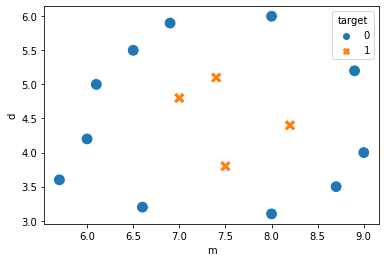

In [15]:
sns.scatterplot(x='m',y='d',data= df,hue='target',style = 'target',s = 140)
plt.show()